In [156]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test, y_test) = mnist.load_data()

In [157]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [158]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [159]:
net= models. Sequential()

from keras.models import Sequential
from keras.layers import Dense, Activation
net.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(512,activation='relu'))
net.add(layers.Dense(512,activation='relu'))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

X_train= X_train.reshape((60000,28*28))
X_train= X_train/255

X_test = X_test.reshape((10000,28*28))
X_test = X_test/255
net.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_79 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_80 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_81 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [160]:
net.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2134 - accuracy: 0.9347
Epoch 2/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0753 - accuracy: 0.9765
Epoch 3/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0499 - accuracy: 0.9841
Epoch 4/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0364 - accuracy: 0.9885
Epoch 5/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0296 - accuracy: 0.9906


In [161]:
test_loss, test_acc=net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9810


In [162]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [163]:
val = net.fit(partial_X_train, partial_y_train, epochs=20, batch_size=128, validation_data=(X_val,y_val))

Epoch 1/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0259 - val_accuracy: 0.9908
Epoch 2/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 3/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0182 - accuracy: 0.9937 - val_loss: 0.0386 - val_accuracy: 0.9886
Epoch 4/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0469 - val_accuracy: 0.9863
Epoch 5/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0306 - val_accuracy: 0.9914
Epoch 6/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0463 - val_accuracy: 0.9867
Epoch 7/20
391/391 [==============================] - 10s 26ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0380 - val_accuracy:

In [164]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

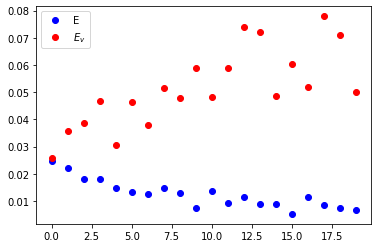

In [165]:
x=np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss, 'ro', label='$E_v$')
plt.legend()

## fashion MNIST

In [206]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [207]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [208]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [211]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test.astype('float32')
x_test = x_test/255

In [212]:
y_onehot_train = to_categorical(y_train, num_classes=10)
y_onehot_test = to_categorical(y_test, num_classes=10)

In [213]:
for i in [x_train, y_onehot_train, x_test, y_onehot_test]:
    print(i.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [214]:
INPUT_SHAPE = (28, 28, 1) 
OUTPUT_SHAPE = 10 
BATCH_SIZE = 128 
EPOCHS = 10
VERBOSE = 1

In [215]:
model = Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=INPUT_SHAPE),
  MaxPooling2D(pool_size=(2, 2)),

  Flatten(),

  Dense(128, activation='relu'),
  Dropout(0.25),

  Dense(64, activation='relu'),
  Dropout(0.25),

  Dense(10, activation='softmax')
])

In [216]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [217]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)              

In [218]:
history = model.fit(
    x_train, y_onehot_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    validation_split=0.3
)

Epoch 1/10
329/329 [==============================] - 20s 60ms/step - loss: 0.6967 - accuracy: 0.7536 - val_loss: 0.4023 - val_accuracy: 0.8518
Epoch 2/10
329/329 [==============================] - 20s 60ms/step - loss: 0.4086 - accuracy: 0.8576 - val_loss: 0.3195 - val_accuracy: 0.8839
Epoch 3/10
329/329 [==============================] - 19s 59ms/step - loss: 0.3429 - accuracy: 0.8796 - val_loss: 0.3006 - val_accuracy: 0.8906
Epoch 4/10
329/329 [==============================] - 19s 59ms/step - loss: 0.3017 - accuracy: 0.8946 - val_loss: 0.2890 - val_accuracy: 0.8956
Epoch 5/10
329/329 [==============================] - 20s 60ms/step - loss: 0.2793 - accuracy: 0.8994 - val_loss: 0.2712 - val_accuracy: 0.9024
Epoch 6/10
329/329 [==============================] - 19s 59ms/step - loss: 0.2530 - accuracy: 0.9093 - val_loss: 0.2618 - val_accuracy: 0.9062
Epoch 7/10
329/329 [==============================] - 19s 59ms/step - loss: 0.2364 - accuracy: 0.9160 - val_loss: 0.2621 - val_accuracy:

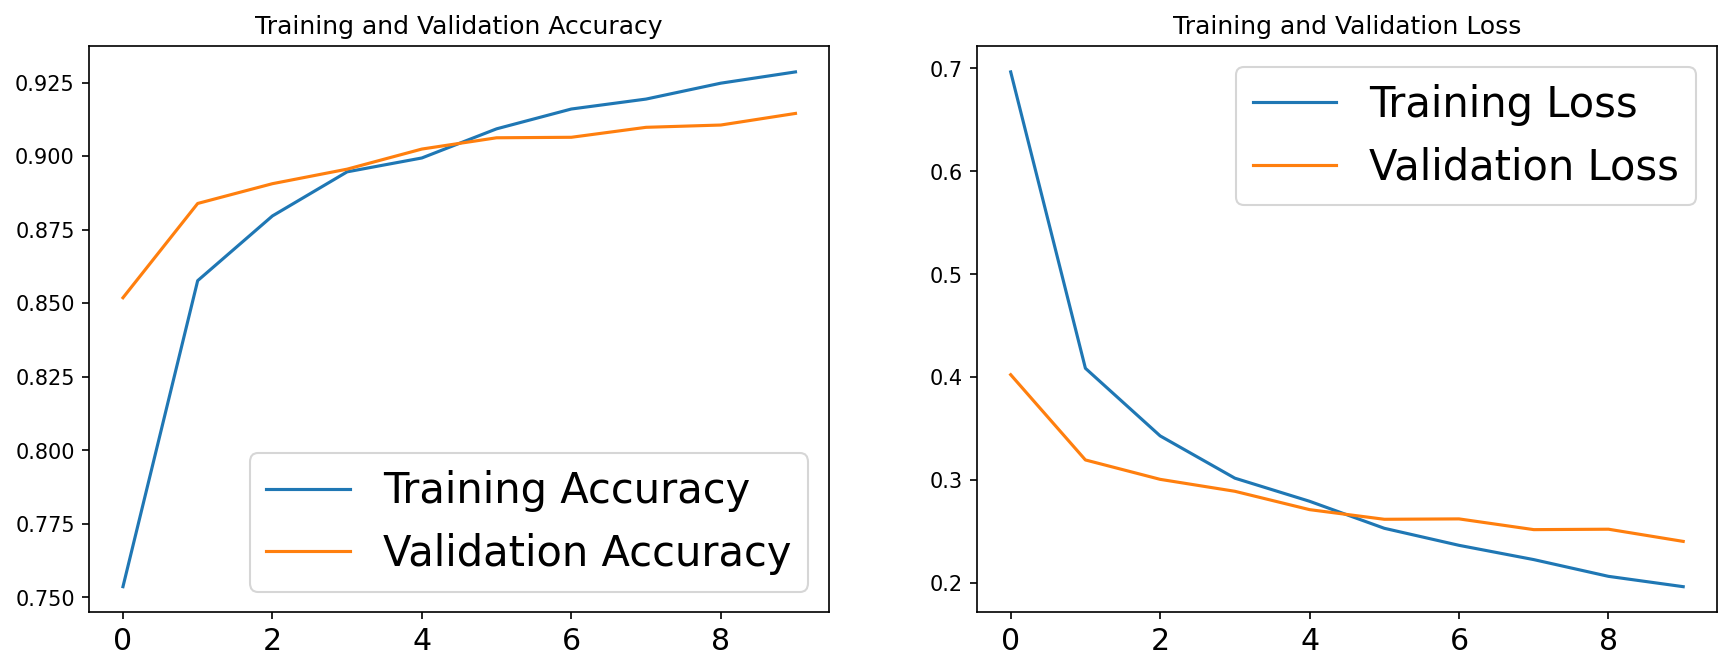

In [219]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [220]:
model.evaluate(x_test, y_onehot_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2500 - accuracy: 0.9121


[0.24999301135540009, 0.9121000170707703]